
# Showing Linear Transformation of a vector
$x = [[1],[1]]$ and $b = Ax$ with $A=[[2,0],[0,1]]$ 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

def plot_vect(x, b, xlim, ylim):
    '''
    function to plot two vectors, 
    x - the original vector
    b - the transformed vector
    xlim - the limit for x
    ylim - the limit for y
    '''
    plt.figure(figsize = (10, 6))
    plt.quiver(0,0,x[0],x[1],\
        color='k',angles='xy',\
        scale_units='xy',scale=1,\
        label='Original vector')
    plt.quiver(0,0,b[0],b[1],\
        color='g',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Transformed vector')
    plt.axhline(y=0) 
    plt.axvline(x=0) 
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

## Scaling of column vector 

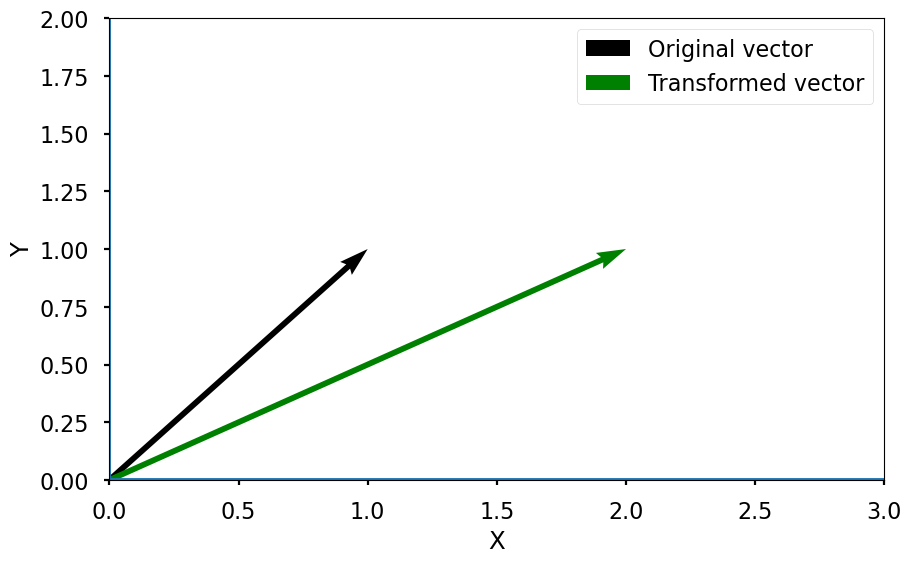

In [19]:
A = np.array([[2,0],[0,1]])
x = np.array([[1],[1]]) 
b = np.dot(A,x)
plot_vect(x,b,(0,3),(0,2)) 

## Reflection on x-axis 

[[ 1]
 [-1]]


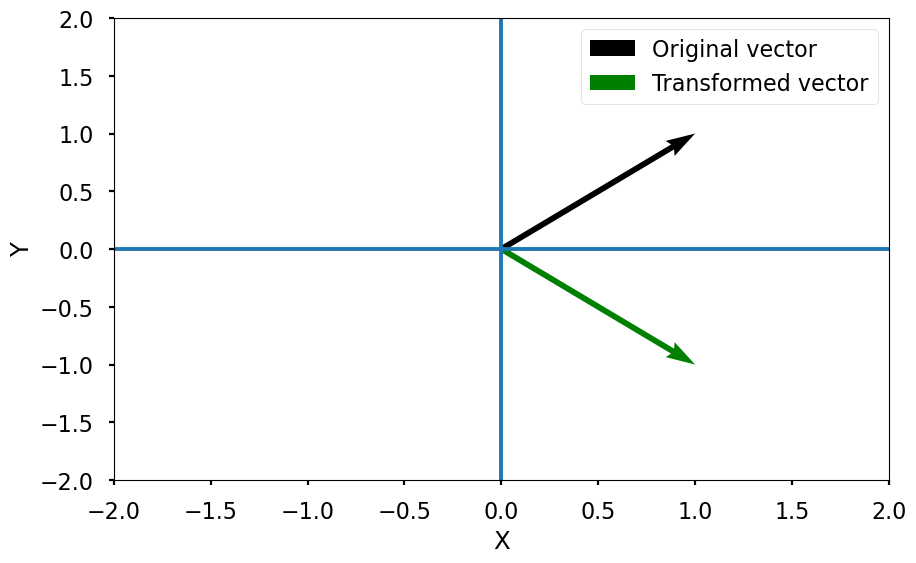

In [20]:
Rx = np.array([[1,0],[0,-1]])
x = np.array([[1],[1]]) 
b = np.dot(Rx,x)
print(b) 
plot_vect(x,b,(-2,2),(-2,2)) 

## Reflection on y-axis 

[[-1]
 [ 1]]


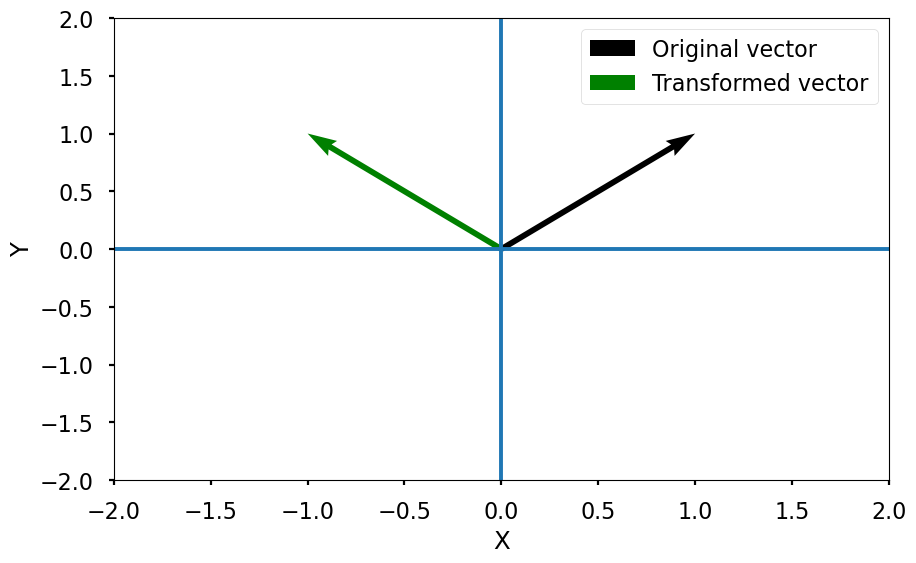

In [21]:
Ry = np.array([[-1,0],[0,1]])
x = np.array([[1],[1]]) 
b = np.dot(Ry,x)
print(b) 
plot_vect(x,b,(-2,2),(-2,2)) 

## Rotation by an angle $\theta$ 

[[0.3660254]
 [1.3660254]]


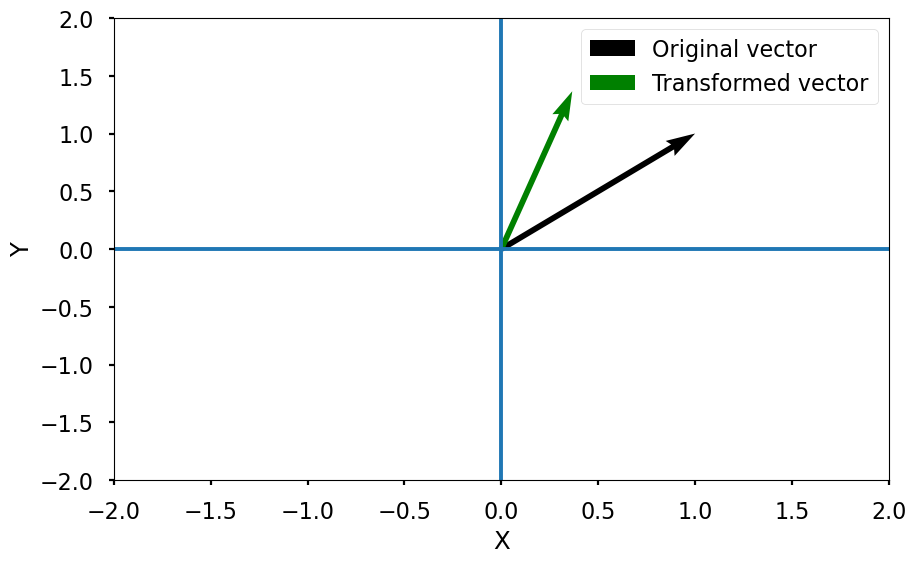

In [26]:
th = 30*np.pi/180 
Rtheta = np.array([[np.cos(th),-np.sin(th)],[np.sin(th),np.cos(th)]])
x = np.array([[1],[1]]) 
b = np.dot(Rtheta,x)
print(b) 
plot_vect(x,b,(-2,2),(-2,2)) 

## Translational of a vector

[[1]
 [0]]
[[2]
 [1]]


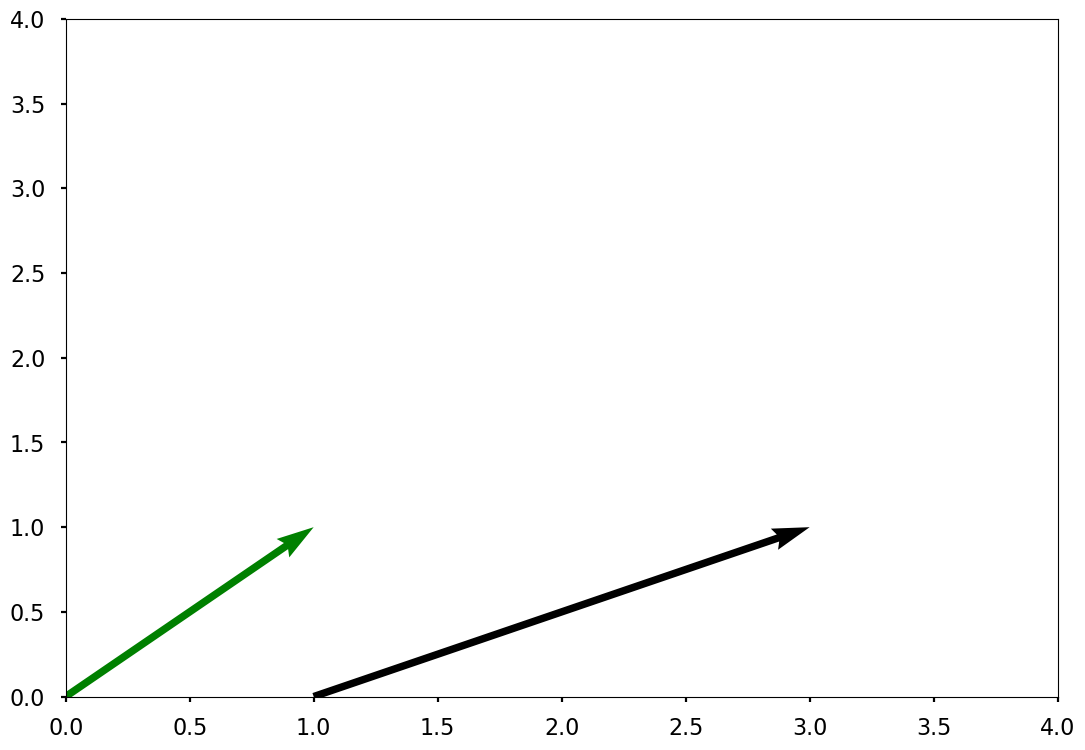

In [31]:
tx = 1
ty = 0 

TMat = np.array([[tx],[ty]])

x0 = np.array([[0],[0]]) 
x1 = np.array([[1],[1]]) 

x0p = np.add(x0,TMat)  
x1p = np.add(x1,TMat) 

print(x0p)
print(x1p) 

plt.xlim((0,4))
plt.ylim((0,4)) 

plt.quiver(x0[0],x0[1],x1[0],x1[1],\
        color='g',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Original Vector')

plt.quiver(x0p[0],x0p[1],x1p[0],x1p[1],angles='xy',scale_units='xy',scale=1)


#plot_vect(x,b,(-2,2),(-2,2)) 

*** 

## __Shear of 2-D object__

_Horizontal shear (x-direction shear)_

$$
\left(\begin{matrix} 
1 & s_x \\ 
0 & 1
\end{matrix} \right) 
$$
where $s_x$ is the x-direction shearing parameter 

_Vertical shear (y-direction shear)_

$$
\left(\begin{matrix} 
1 & 0 \\ 
s_y & 1
\end{matrix} \right) 
$$
where $s_y$ is the y-direction shearing parameter 

_Generic Shear_

$$
\left(\begin{matrix} 
1 & s_x \\ 
s_y & 1
\end{matrix} \right) 
$$

If there is a column vector $v=(x,y)$ the vector after generic shear is given by 
$$
\left(\begin{matrix}
x_1 \\ y_1 
\end{matrix}\right) 
= 
\left(\begin{matrix} 
1 & s_x \\ 
s_y & 1
\end{matrix} \right) 
\left(\begin{matrix}
x \\ y 
\end{matrix}\right) 
$$
The transformation of coordinates : 
$$
x_1 = x + s_x y \\ 
y_1 = s_y x + y 
$$




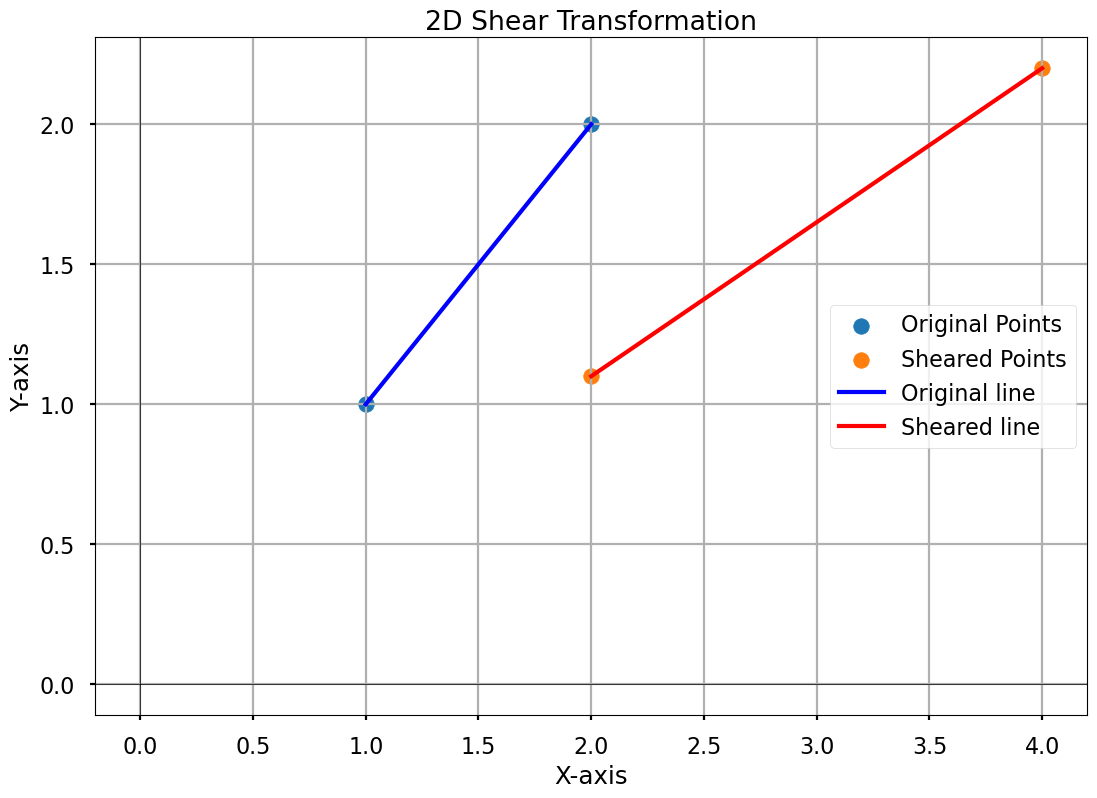

In [55]:
# Define the original points
x = np.array([1,2])
y = np.array([1,2])

# Define shear factors
x_shear = 1
y_shear = 0.1

# Apply shear transformation
sheared_x = x + x_shear * y
sheared_y = y + y_shear * x

# Plot the original and sheared points
plt.scatter(x, y, label='Original Points')
plt.scatter(sheared_x, sheared_y, label='Sheared Points')

plt.plot(x,y,color='blue',linewidth=3, label='Original line') 
plt.plot(sheared_x,sheared_y,color='red',linewidth=3, label='Sheared line') 

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Shear Transformation')
plt.legend()
plt.grid()
plt.show()

# Eigenvalues and Eigenvectors 
$$Ax = \lambda{x}$$
where $A$ is a $n \times n$ matrix and $x$ is a column vector. The value $\lambda$ satisfied by above equation are the eigenvalues and the corresponding values of $x$ are called eigenvectors. 

# Characteristic Equation 

$$(A-\lambda{I})x=0$$ 

There are two possible solutions of the above equation:
-  $x=0$ trivial solution 
-  $(A-\lambda{I}) = 0$ no-trivial solution 

For non-trivial solution 
$$ det(A-\lambda{I}) = 0$$ 
is known as **Characteristic Equation** 

## **Power method to find largest eigenvalue** 

If *x* is the eigenvector of a matrix $A$, then its corresponding eigenvalue is 
$$
\lambda = \frac{Ax.x}{x.x} 
$$

In [7]:
import numpy as np

def power_iteration(A, x0, tol=1e-6, max_iter=1000):
    x = x0 / np.linalg.norm(x0)
    
    for i in range(max_iter):
        y = np.dot(A, x)
        eigenvalue = np.dot(x, y)
        x = y / np.linalg.norm(y)
        
        if np.linalg.norm(np.dot(A, x) - eigenvalue * x) < tol:
            break
    
    eigenvector = x / np.linalg.norm(x)
    return eigenvalue, eigenvector

# Example matrix
A = np.array([[0, 2],
              [2,  3]])

# Initial guess for eigenvector
x0 = np.array([1, 1])

dominant_eigenvalue, eigenvector = power_iteration(A, x0)

print("Dominant Eigenvalue:", dominant_eigenvalue)
print("Corresponding Eigenvector:", eigenvector)

Dominant Eigenvalue: 3.9999999999994946
Corresponding Eigenvector: [0.44721352 0.89442723]


## **Inverse Power method to find smallest eigenvalue** 

Here Power method is used but instead of $A$ we use $A^{-1}$. This will give us smallest eigenvalue 

In [2]:
import numpy as np

def inverse_power_iteration(A, x0, tol=1e-6, max_iter=1000):
    A_inv = np.linalg.inv(A)
    x = x0 / np.linalg.norm(x0)
    
    for i in range(max_iter):
        y = np.dot(A_inv, x)
        eigenvalue = np.dot(x, y)
        x = y / np.linalg.norm(y)
        
        if np.linalg.norm(np.dot(A, x) - eigenvalue * x) < tol:
            break
    
    eigenvector = x / np.linalg.norm(x)
    return eigenvalue, eigenvector

# Example matrix
A = np.array([[0, 2],
              [2,  3]])

# Initial guess for eigenvector
x0 = np.array([1, 1])

eigenvalue, eigenvector = inverse_power_iteration(A, x0)

print("Estimated Eigenvalue:", eigenvalue)
print("Estimated Eigenvector:", eigenvector)


Estimated Eigenvalue: -0.9999999999993605
Estimated Eigenvector: [ 0.89442727 -0.44721344]


## **Eigenvalues of a Complex Matrix** 

$$A = 
\left(\begin{matrix} 
5+2i & 9-2i \\ 
2i & 2-i
\end{matrix} \right) 
$$


In [5]:
import numpy as np
import cmath 
#A = np.array([[5+2j, 9-2j],[0+2j, 2-1j]]) 
A = np.array([[1+2j, -2+1j, 3j],
              [0, 2-1j, 1-1j],
              [-1j, 2j, 3+2j]], dtype=complex)
print("Eigenvalues are : ", np.linalg.eigvals(A)) 

Eigenvalues are :  [4.71106583+1.90038879j 0.08637557+2.03837862j 1.2025586 -0.93876741j]


## **Eigenvalues using QR decomposition**  

Similar matrices have same eigenvalues and eigenvectors. Two matrices $A$ and $B$ are similar if they are related by
transformation 
$$ A = X^{-1} B X$$ 

The QR method decomposes a matrix into two matrices $Q$ and $R$ where $R$ is a upper-traingular matrix and $Q$ is an orthogonal matrix ($Q^{-1} = Q^T$). This means $Q^{-1}Q = Q^T Q = I$ 

Steps for finding eigenvalues by QR decomposition: 
 - Initialize $Q$ and $R$ : Set $Q$ as identiry matrix and $R$ as a copy of $A$ 
       $$A_k = Q_k R_k$$ 
 - Iterative QR decomposition: Use QR decomposition method iteratively untill $R$ becomes a nearly upper triangular matrix.
       $$A_{k+1} = R_k Q_k = Q_k^{-1} Q_k R_k Q_k = Q_k^{-1} A_k Q_k$$       
 - The iteration continues till we converge to 
$$ A_k = R_k Q_k = 
\left(\begin{matrix} 
\lambda_1 & X & ... & X \\ 
0 & \lambda_2 & ... & X \\ 
  &           & ... &   \\ 
0 &     0     &     & \lambda_n  
\end{matrix} \right) 
$$

Diagonal values are the eigenvalues and $Q_k$ represents the matrix of eigenvectors. 




In [15]:
import numpy as np
from scipy.linalg import qr

def qr_eigenvalues_eigenvectors(A, max_iterations=100):
    n = A.shape[0]
    V = np.eye(n)
    
    for i in range(max_iterations):
        Q, R = qr(A)
        A = np.dot(R, Q)
        V = np.dot(V, Q)
    
    eigenvalues = np.diag(A)
    eigenvectors = V
    return eigenvalues, eigenvectors

# Define your matrix A
#A = np.array([[0, 2],[2, 3]])

#A = np.array([[5 + 2j, 9 - 2j],[0 + 2j, 2 - 1j]])
A = np.array([[1+2j, -2+1j, 3j],
              [0, 2-1j, 1-1j],
              [-1j, 2j, 3+2j]], dtype=complex)

eigenvalues, eigenvectors = qr_eigenvalues_eigenvectors(A)

print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[4.71106583+1.90038879j 0.08637557+2.03837862j 1.2025586 -0.93876741j]

Eigenvectors:
[[ 0.50854454+0.46097853j -0.29709933-0.65560801j -0.07188134-0.07499631j]
 [-0.17379982-0.17130432j -0.17842394-0.11421739j  0.36289754-0.87399835j]
 [ 0.49708536-0.47141897j  0.6346362 -0.18511158j -0.22643368-0.20583653j]]


In [6]:
import numpy as np

def qr_algorithm(A, max_iterations=1000, tol=1e-10):
    n = A.shape[0]
    eigenvalues = np.zeros(n, dtype=complex)
    print(A) 
    for i in range(max_iterations):
        Q, R = np.linalg.qr(A)
        A = np.dot(R, Q)
#        print(np.dot(Q,R)) 

        # Check if the off-diagonal elements are below the tolerance
#        off_diag = np.abs(A - np.diag(np.diag(A)))
#        if np.max(off_diag) < tol:
#            eigenvalues = np.diag(A)
#            break
    eigenvalues=np.diag(A) 
    return eigenvalues

# Define your complex matrix A here
A = np.array([[3 + 2j, 1 - 1j],
              [0, 4 - 5j]])

eigenvalues = qr_algorithm(A)
print("Eigenvalues:", eigenvalues)


[[3.+2.j 1.-1.j]
 [0.+0.j 4.-5.j]]
Eigenvalues: [3.+2.j 4.-5.j]


*** 
# **Orthogonal polynomials as eigenfunctions of Hermitian differential operators** 

As an example we are using *Legendre Polynomails* as they are one example of **orthogonal polynomials** 

Methodology:
- Generate a *Hermitian matrix* using *Legendre Polynomails* as basis function 
- Inner Product of *Legendre Polynomails* is used to fill entries of the *Hermitian Matrix* 
- We calculate *eigenvalues* and *eigenfunctions* of this *Hermitian matrix* 


In [3]:
import numpy as np
from scipy.special import legendre
from scipy.integrate import quad

# Define the range and number of Legendre polynomials to generate
n_poly = 5  # Number of Legendre polynomials to compute
x_range = (-1, 1)  # Range for Legendre polynomials (-1 to 1)

# Function to compute the inner product of two functions over the given range
def inner_product(f, g, x_range):
    integrand = lambda x: f(x) * g(x)
    result, _ = quad(integrand, *x_range)  
    return result

# Create an empty matrix for the Hermitian operator
m_size = n_poly
hermitian_mat = np.zeros((m_size, m_size))

# Generate Legendre polynomials and populate the Hermitian operator matrix
for i in range(m_size):
    for j in range(m_size):
        # Calculate the inner product of Legendre polynomials i and j
        inner = inner_product(lambda x: legendre(i)(x), lambda x: legendre(j)(x), x_range)
        
        # Populate the Hermitian matrix
        hermitian_mat[i, j] = inner

print(hermitian_mat) 
# Calculate the eigenvalues and eigenvectors of the Hermitian matrix
eigenvalues, eigenvectors = np.linalg.eigh(hermitian_mat)

# Display the eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


[[ 2.00000000e+00  0.00000000e+00  6.93889390e-17  7.23918208e-18
   8.32667268e-17]
 [ 0.00000000e+00  6.66666667e-01 -1.47168740e-17  9.71445147e-17
  -3.25255458e-17]
 [ 6.93889390e-17 -1.47168740e-17  4.00000000e-01 -4.74886638e-17
   5.20417043e-17]
 [ 7.23918208e-18  9.71445147e-17 -4.74886638e-17  2.85714286e-01
  -3.08470726e-17]
 [ 8.32667268e-17 -3.25255458e-17  5.20417043e-17 -3.08470726e-17
   2.22222222e-01]]
Eigenvalues:
[0.22222222 0.28571429 0.4        0.66666667 2.        ]

Eigenvectors:
[[ 6.24500451e-17  5.42938656e-18 -5.20417043e-17 -1.18738343e-32
   1.00000000e+00]
 [ 0.00000000e+00  2.35922393e-16  2.22044605e-16 -1.00000000e+00
   0.00000000e+00]
 [-2.31295520e-16 -5.23783015e-16  1.00000000e+00  2.52855804e-16
   5.20417043e-17]
 [-5.52524838e-16 -1.00000000e+00 -4.93116972e-16 -2.35003030e-16
   5.42938656e-18]
 [-1.00000000e+00  5.46541264e-16 -2.14015940e-16  5.91778995e-17
   6.24500451e-17]]


Momentum operator matrix: [[0.+7.12323545e-17j 0.-2.00000000e+00j 0.+2.22044605e-16j]
 [0.+3.55269136e-17j 0.+0.00000000e+00j 0.-1.99998744e+00j]
 [0.+1.72715003e-17j 0.-1.25627352e-05j 0.+5.55111512e-17j]]
Eigenvalues of the Momentum Operator:
[ 0.00000000e+00-2.74956888e-12j -3.23117427e-27-5.01251558e-03j
  6.40685682e-19+5.01251559e-03j]


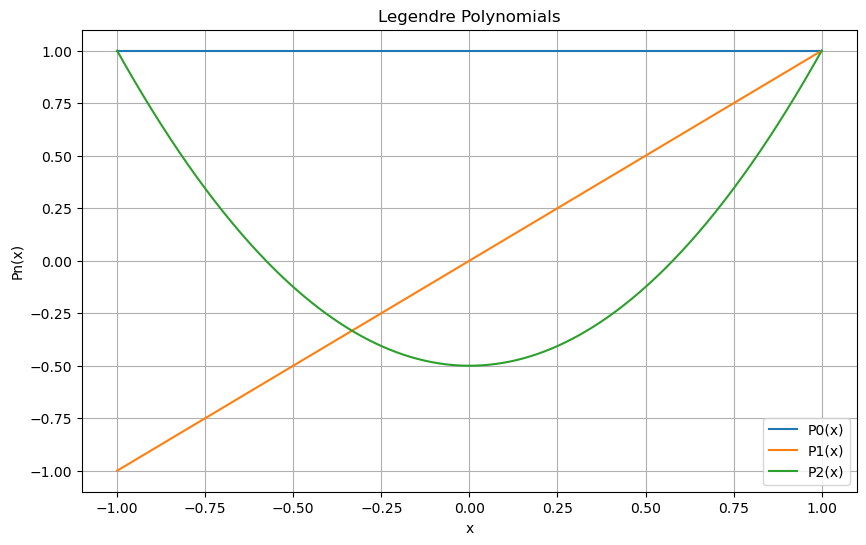

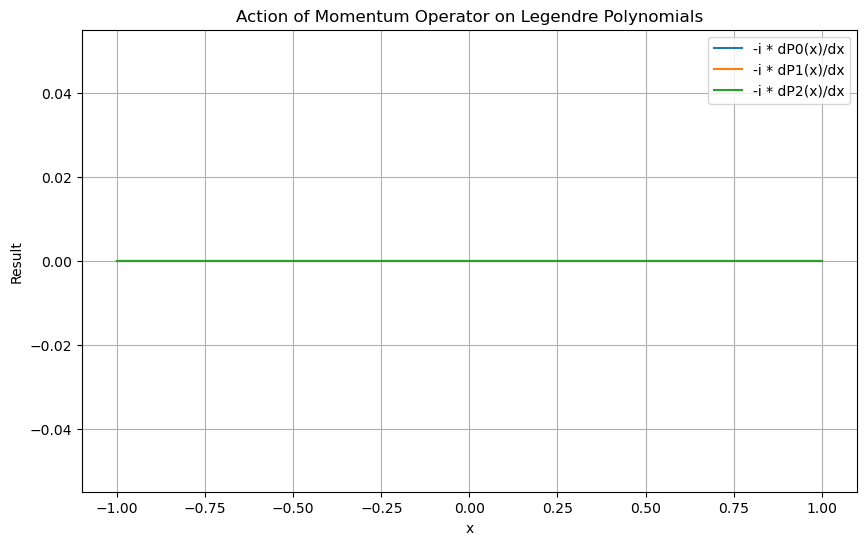

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre
from scipy.linalg import eig

# Define the range for plotting Legendre polynomials
x = np.linspace(-1, 1, 400)

# Number of Legendre polynomials to compute
n_polynomials = 3

# Initialize an array to store Legendre polynomials
legendre_polynomials = []

# Compute and store Legendre polynomials
for n in range(n_polynomials):
    legendre_polynomial = legendre(n)
    legendre_polynomials.append(legendre_polynomial(x))

# Plot Legendre polynomials
plt.figure(figsize=(10, 6))
for n in range(n_polynomials):
    plt.plot(x, legendre_polynomials[n], label=f'P{n}(x)')

plt.title('Legendre Polynomials')
plt.xlabel('x')
plt.ylabel('Pn(x)')
plt.legend()
plt.grid(True)

# Calculate the action of the momentum operator on Legendre polynomials
momentum_operator_action = []
for n in range(n_polynomials):
    derivative = -1j * np.gradient(legendre_polynomials[n], x)
    momentum_operator_action.append(derivative)

# Plot the result of the momentum operator action
plt.figure(figsize=(10, 6))
for n in range(n_polynomials):
    plt.plot(x, np.real(momentum_operator_action[n]), label=f'-i * dP{n}(x)/dx')

plt.title('Action of Momentum Operator on Legendre Polynomials')
plt.xlabel('x')
plt.ylabel('Result')
plt.legend()
plt.grid(True)

# Calculate and display some eigenvalues of the momentum operator
momentum_operator_matrix = np.zeros((n_polynomials, n_polynomials), dtype=complex)
for n in range(n_polynomials):
    for m in range(n_polynomials):
        # Calculate the integral of the product
        integral_result = np.trapz(np.conj(legendre_polynomials[n]) * momentum_operator_action[m], x)
        momentum_operator_matrix[n, m] = integral_result

print("Momentum operator matrix:", momentum_operator_matrix) 
eigenvalues = eig(momentum_operator_matrix)[0]
print("Eigenvalues of the Momentum Operator:")
print(eigenvalues)

plt.show()


Momentum operator matrix: [[0.+7.12323545e-17j 0.-2.00000000e+00j 0.+2.22044605e-16j]
 [0.+3.55269136e-17j 0.+0.00000000e+00j 0.-1.99998744e+00j]
 [0.+1.72715003e-17j 0.-1.25627352e-05j 0.+5.55111512e-17j]]


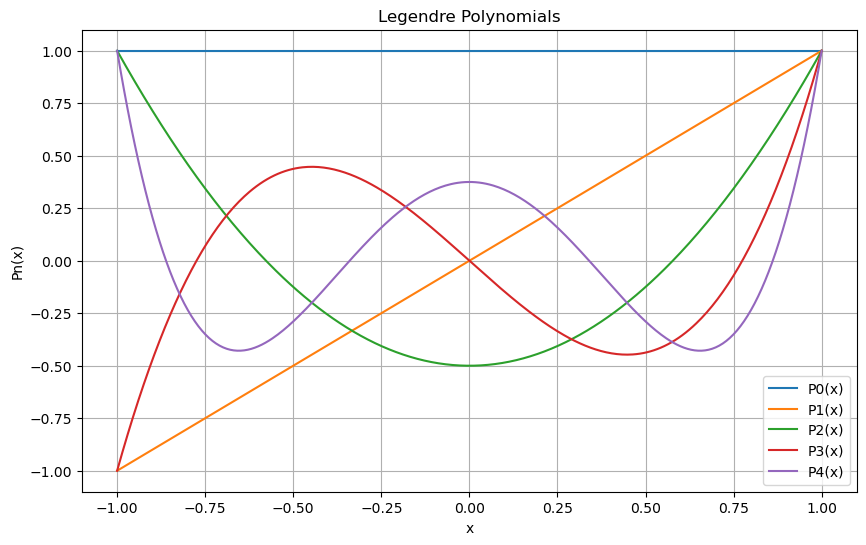

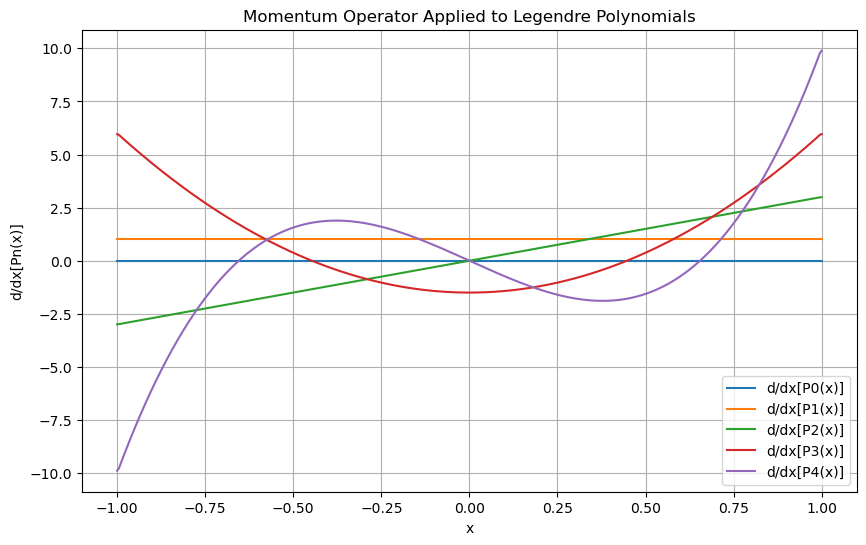

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

# Define the range for plotting Legendre polynomials
x = np.linspace(-1, 1, 400)

# Number of Legendre polynomials to compute
n_polynomials = 5

# Initialize an array to store Legendre polynomials
legendre_polynomials = []

# Compute and store Legendre polynomials
for n in range(n_polynomials):
    legendre_polynomial = legendre(n)
    legendre_polynomials.append(legendre_polynomial(x))

# Plot Legendre polynomials
plt.figure(figsize=(10, 6))
for n in range(n_polynomials):
    plt.plot(x, legendre_polynomials[n], label=f'P{n}(x)')

plt.title('Legendre Polynomials')
plt.xlabel('x')
plt.ylabel('Pn(x)')
plt.legend()
plt.grid(True)

# Apply the momentum operator (d/dx) to Legendre polynomials
momentum_operator_legendre = []

for n in range(n_polynomials):
    derivative = np.gradient(legendre_polynomials[n], x)
    momentum_operator_legendre.append(derivative)

print("Momentum operator matrix:", momentum_operator_matrix) 
# Plot the result of applying the momentum operator
plt.figure(figsize=(10, 6))
for n in range(n_polynomials):
    plt.plot(x, momentum_operator_legendre[n], label=f'd/dx[P{n}(x)]')

plt.title('Momentum Operator Applied to Legendre Polynomials')
plt.xlabel('x')
plt.ylabel('d/dx[Pn(x)]')
plt.legend()
plt.grid(True)

plt.show()


*** 
# **Determination of the principal axes of moment of inertia through diagonalization** 

A rigid body rotating around a axis with fixed angular velosity $\omega$. The axis passes through origin. $r_i$ is the position vector of $i$ point with mass $m_i$ 
$$
\frac{d r_i}{dt} = \omega \times r_i
$$
Total Angular Momentum of a body around origin 
$$
L = \sum_{i=1,n} m_i r_i \times \frac{d r_i}{dt} = \sum_{i=1,n} m_i r_i \times (\omega \times r_i) =
\sum_{i=1,n} m_i [ r_i^2 \omega - (r_i.\omega) r_i] 
$$
One can re-write above equation in matrix notation as :
$$
\left(\begin{matrix} 
L_x \\ L_y \\ L_z 
\end{matrix} \right) 
= 
\left(\begin{matrix} 
I_{xx} & I_{xy} & I_{xz} \\ 
I_{yx} & I_{yy} & I_{yz} \\
I_{zx} & I_{zy} & I_{zz}  
\end{matrix} \right) 
\left(\begin{matrix} 
\omega_x \\ \omega_y \\ \omega_z 
\end{matrix} \right) 
$$
$$L = I \omega$$ 
with $I_{ij}$ is known as *Moment of Inertia Tensor* 

## **Moment of Inertia Tensor**

$$
I_{xx} = \sum_{i=1,n} (y_i^2 + z_i^2) m_i = \int (y^2 + z^2) dm \\
I_{yy} = \sum_{i=1,n} (x_i^2 + z_i^2) m_i = \int (x^2 + z^2) dm  \\
I_{zz} = \sum_{i=1,n} (x_i^2 + y_i^2) m_i = \int (x^2 + y^2) dm  \\
I_{xy} = I_{yx} = - \sum_{i=1,n} x_i y_i m_i = - \int x y dm  \\
I_{yz} = I_{zy} = - \sum_{i=1,n} y_i z_i m_i = - \int y z dm  \\
I_{xz} = I_{zx} = - \sum_{i=1,n} x_i z_i m_i = - \int x z dm  
$$ 

Moment of Inertia (MI) matrix is a symmetric matrix, one can diagonalize this matrix to get a diagonal matrix. 

### **Principal Axis**

Disgonalization of MI tensor means finding out a new set of axis $(x',y',z')$ such that the MI tensor becomes diagonal.
$$
I = \left(\begin{matrix} 
I_{aa} & I_{xy} & I_{xz} \\ 
I_{bb} & I_{yy} & I_{yz} \\
I_{cc} & I_{zy} & I_{zz}  
\end{matrix} \right) 
$$ 
The three diagonal entries of MI tensor are known as *Principal components* of MI and the axis that leads to such diagonal MI are known as *Principal axis* 



In [2]:
import numpy as np

# Define the properties of the rectangular plate
length = 4.0
width = 2.0
mass = 10.0

# Calculate the moments of inertia components for a rectangle about its center of mass
Ixx = (mass / 12.0) * (width ** 2 + length ** 2)
Iyy = (mass / 12.0) * (width ** 2 + length ** 2)
Izz = (mass / 12.0) * (width ** 2 + length ** 2)
Ixy = 0.0
Ixz = 0.0
Iyz = 0.0

# Create the moment of inertia tensor as a 3x3 symmetric matrix
I = np.array([[Ixx, Ixy, Ixz],
              [Ixy, Iyy, Iyz],
              [Ixz, Iyz, Izz]])

print(I) 

# Diagonalize the moment of inertia tensor
eigenvalues, eigenvectors = np.linalg.eigh(I)

# Eigenvalues represent the principal moments of inertia
I1, I2, I3 = eigenvalues

# Eigenvectors represent the principal axes
principal_axis1 = eigenvectors[:, 0]
principal_axis2 = eigenvectors[:, 1]
principal_axis3 = eigenvectors[:, 2]

print("Principal Moments of Inertia (I1, I2, I3):", I1, I2, I3)
print("Principal Axes:")
print("Axis 1:", principal_axis1)
print("Axis 2:", principal_axis2)
print("Axis 3:", principal_axis3)


[[16.66666667  0.          0.        ]
 [ 0.         16.66666667  0.        ]
 [ 0.          0.         16.66666667]]
Principal Moments of Inertia (I1, I2, I3): 16.666666666666668 16.666666666666668 16.666666666666668
Principal Axes:
Axis 1: [1. 0. 0.]
Axis 2: [0. 1. 0.]
Axis 3: [0. 0. 1.]
